# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

In [2]:
# Read your api key environment variable
# YOUR CODE HERE!
load_dotenv()
api_key = os.getenv("NEWSAPI_API_KEY")


In [3]:
# Create a newsapi client
# YOUR CODE HERE!
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key=api_key)

In [4]:
# Fetch the Bitcoin news articles
# YOUR CODE HERE!
bitcoin_news = newsapi.get_everything(
    q="bitcoin",
    language="en",
    sort_by="relevancy"
)

# bitcoin_news
print(f"Total articles about Bitcoin: {bitcoin_news['totalResults']}")
bitcoin_news["articles"][0]

Total articles about Bitcoin: 8967


{'source': {'id': 'engadget', 'name': 'Engadget'},
 'author': 'Jon Fingas',
 'title': 'Tesla buys $1.5 in Bitcoin, will soon accept it as payment',
 'description': 'Elon Musk’s cryptocurrency hype was more than just idle talk. CNBC reports that Tesla not only bought $1.5 billion worth of Bitcoin to help “diversify and maximize” its returns, but will start taking payments using the digital asset sometime in the “near futu…',
 'url': 'https://www.engadget.com/tesla-to-take-bitcoin-payments-140109988.html',
 'urlToImage': 'https://s.yimg.com/os/creatr-uploaded-images/2021-02/389f89e0-6a11-11eb-b5c5-309f2241e56a',
 'publishedAt': '2021-02-08T14:01:09Z',
 'content': 'Elon Musks cryptocurrency hype was more than just idle talk. CNBCreports that Tesla not only bought $1.5 billion worth of Bitcoin to help diversify and maximize its returns, but will start taking pay… [+1182 chars]'}

In [5]:
# Fetch the Ethereum news articles
# YOUR CODE HERE!
ethereum_news = newsapi.get_everything(
    q="ethereum",
    language="en", 
    sort_by='relevancy'
)

print(f"Total articles about Ethereum: {ethereum_news['totalResults']}")
ethereum_news["articles"][0]

Total articles about Ethereum: 1818


{'source': {'id': 'engadget', 'name': 'Engadget'},
 'author': 'Jon Fingas',
 'title': 'NVIDIA limits RTX 3060 crypto speeds as it introduces mining cards',
 'description': "Worried that the GeForce RTX 3060 will be sold out as cryptocurrency miners snap up every GPU in sight? NVIDIA thinks it has a simple way to help: make the new card unattractive to the crypto crowd. The company has revealed that it's cutting the hash rate (mi…",
 'url': 'https://www.engadget.com/nvidia-limits-rtx-3060-for-crypto-mining-161657361.html',
 'urlToImage': 'https://s.yimg.com/uu/api/res/1.2/VLoRobjl1FcFEgV_0XjzqQ--~B/aD0xMDY3O3c9MTYwMDthcHBpZD15dGFjaHlvbg--/https://s.yimg.com/os/creatr-uploaded-images/2021-02/cad5ae60-7200-11eb-bbbc-25bd3507e406.cf.jpg',
 'publishedAt': '2021-02-18T16:16:57Z',
 'content': 'Worried that the GeForce RTX 3060 will be sold out as cryptocurrency miners snap up every GPU in sight? NVIDIA thinks it has a simple way to help: make the new card unattractive to the crypto crowd. … [

In [20]:
analyzer.polarity_scores('None')

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [14]:
analyzer.polarity_scores(bitcoin_news['articles'][0]['content'])

{'neg': 0.0, 'neu': 0.909, 'pos': 0.091, 'compound': 0.3182}

In [77]:
# Create the Bitcoin sentiment scores DataFrame
# YOUR CODE HERE!

sentiments=[]
for each_article in bitcoin_news['articles']: 
    # print(each_article['content'])
    if each_article['content']: 
        scores=analyzer.polarity_scores(each_article['content'])
        scores['content']=each_article['content']
        sentiments.append(scores)
bitcoin_sentiments_df=pd.DataFrame(sentiments)
bitcoin_sentiments_df

,neg,neu,pos,compound,content
0,0.000,0.909,0.091,0.3182,Elon Musks cryptocurrency hype was more than j...
1,0.000,0.929,0.071,0.3818,"Tesla, led by Elon Musk, confirmed that it pur..."
2,0.038,0.962,0.000,-0.1027,"For a brief moment on Sunday, before Tesla sai..."
3,0.000,0.944,0.056,0.2500,Twitter and Square CEO Jack Dorsey and rapper ...
4,0.000,0.863,0.137,0.6597,"Today in an SEC filing, Tesla disclosed that i..."
5,0.032,0.916,0.051,0.1779,When Bitcoin first appeared out of digital thi...
6,0.000,1.000,0.000,0.0000,TL;DR: The Bitcoin and Cryptocurrency Mastery ...
7,0.000,1.000,0.000,0.0000,"LiveUpdated Feb. 9, 2021, 8:01 a.m. ET\r\nFeb...."
8,0.000,0.860,0.140,0.7041,"Bitcoin is the future, again: this morning, it..."
9,0.082,0.852,0.066,-0.1280,Jack Dorsey and Jay Z create a bitcoin endowme...


In [78]:
# Create the ethereum sentiment scores DataFrame
# YOUR CODE HERE!
sentiments=[]
for each_article in ethereum_news['articles']: 
    if each_article['content']:
        scores=analyzer.polarity_scores(each_article['content'])
        scores['content']=each_article['content']
        sentiments.append(scores)
ethereum_sentiments_df=pd.DataFrame(sentiments)
ethereum_sentiments_df

,neg,neu,pos,compound,content
0,0.119,0.818,0.063,-0.3400,Worried that the GeForce RTX 3060 will be sold...
1,0.000,1.000,0.000,0.0000,Coinbase plans to go public by way of a direct...
2,0.000,1.000,0.000,0.0000,FILE PHOTO: Representation of the Ethereum vir...
3,0.000,1.000,0.000,0.0000,By Reuters Staff\r\nFILE PHOTO: Representation...
4,0.000,0.970,0.030,0.0258,While the first Christie's auction of digital ...
5,0.000,0.856,0.144,0.7096,Attempting to get ahead of cryptocurrency mine...
6,0.000,0.873,0.127,0.4939,"By Reuters Staff\r\nSINGAPORE, Feb 9 (Reuters)..."
7,0.000,1.000,0.000,0.0000,By Reuters Staff\r\nFILE PHOTO: The logo of th...
8,0.000,0.861,0.139,0.5719,"NEW YORK (Reuters) - Ethereum, the second larg..."
9,0.000,0.865,0.135,0.5719,"NEW YORK, Feb 18 (Reuters) - Ethereum, the sec..."


In [26]:
# Use descriptive statistics to answer the following questions:
display(bitcoin_sentiments_df.describe())
display(ethereum_sentiments_df.describe())
# Which coin had the highest mean positive score?
# Bitcoin
# Which coin had the highest negative score?
# Ethereum
# Which coin had the highest positive score?
# Bitcoin

,neg,neu,pos,compound
count,20.000000,20.000000,20.000000,20.000000
mean,0.018750,0.913700,0.067450,0.188830
std,0.034113,0.080093,0.083672,0.358779
min,0.000000,0.647000,0.000000,-0.503700
25%,0.000000,0.880250,0.000000,0.000000
50%,0.000000,0.919500,0.051000,0.177900
75%,0.032000,0.959000,0.093500,0.391725
max,0.114000,1.000000,0.353000,0.921700


,neg,neu,pos,compound
count,20.000000,20.000000,20.000000,20.000000
mean,0.005950,0.942750,0.051300,0.189495
std,0.026609,0.062097,0.054785,0.274088
min,0.000000,0.818000,0.000000,-0.340000
25%,0.000000,0.900000,0.000000,0.000000
50%,0.000000,0.949500,0.046500,0.012900
75%,0.000000,1.000000,0.082000,0.365100
max,0.119000,1.000000,0.144000,0.709600


In [27]:

def bitcoin_sentiment(score):
    """
    Calculates the sentiment based on the compound score.
    """
    result = 0  # Neutral by default
    if score >= 0.05:  # Positive
        result = 1
    elif score <= -0.05:  # Negative
        result = -1

    return result

In [28]:

def ethereum_sentiment(score):
    """
    Calculates the sentiment based on the compound score.
    """
    result = 0  # Neutral by default
    if score >= 0.05:  # Positive
        result = 1
    elif score <= -0.05:  # Negative
        result = -1

    return result

In [80]:
# Describe the Bitcoin Sentiment
# YOUR CODE HERE!
bitcoin_sentiments_df.describe()

,neg,neu,pos,compound
count,18.000000,18.000000,18.000000,18.000000
mean,0.019056,0.908778,0.072111,0.199928
std,0.035630,0.081887,0.086707,0.376340
min,0.000000,0.647000,0.000000,-0.503700
25%,0.000000,0.868750,0.000000,0.000000
50%,0.000000,0.919500,0.053500,0.177900
75%,0.024000,0.957250,0.098500,0.411575
max,0.114000,1.000000,0.353000,0.921700


In [81]:
# Describe the Ethereum Sentiment
# YOUR CODE HERE!
ethereum_sentiments_df.describe()

,neg,neu,pos,compound
count,20.000000,20.000000,20.000000,20.000000
mean,0.005950,0.942750,0.051300,0.189495
std,0.026609,0.062097,0.054785,0.274088
min,0.000000,0.818000,0.000000,-0.340000
25%,0.000000,0.900000,0.000000,0.000000
50%,0.000000,0.949500,0.046500,0.012900
75%,0.000000,1.000000,0.082000,0.365100
max,0.119000,1.000000,0.144000,0.709600


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin

Q: Which coin had the highest compound score?

A: Ethereum

Q. Which coin had the highest positive score?

A: Bitcoin

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [32]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

wnl=WordNetLemmatizer()

In [33]:
split_words=bitcoin_news['articles'][0]['content'].split(' ')
lower_words=[each_word.lower() for each_word in split_words]
lower_words

['elon',
 'musks',
 'cryptocurrency',
 'hype',
 'was',
 'more',
 'than',
 'just',
 'idle',
 'talk.',
 'cnbcreports',
 'that',
 'tesla',
 'not',
 'only',
 'bought',
 '$1.5',
 'billion',
 'worth',
 'of',
 'bitcoin',
 'to',
 'help',
 'diversify',
 'and',
 'maximize',
 'its',
 'returns,',
 'but',
 'will',
 'start',
 'taking',
 'pay…',
 '[+1182',
 'chars]']

In [34]:
# Expand the default stopwords list if necessary
# YOUR CODE HERE!
stop=stopwords.words('english')
#stop.append('u')

In [35]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Create a list of the words
    words=word_tokenize(text)
    
    # Convert the words to lowercase
    lower=[each_word.lower() for each_word in words]
    
    # Remove the punctuation
    rem_punc=[each_word for each_word in lower if each_word not in punctuation]

    # Remove the stop words
    rem_stop=[each_word for each_word in rem_punc if each_word not in stop]
   
    # Lemmatize Words into root words
    tokens=[wnl.lemmatize(each_word) for each_word in rem_stop]
    
    return tokens


In [36]:
tokenizer(bitcoin_news['articles'][0]['content'])

['elon',
 'musk',
 'cryptocurrency',
 'hype',
 'idle',
 'talk',
 'cnbcreports',
 'tesla',
 'bought',
 '1.5',
 'billion',
 'worth',
 'bitcoin',
 'help',
 'diversify',
 'maximize',
 'return',
 'start',
 'taking',
 'pay…',
 '+1182',
 'char']

In [73]:
bitcoin_sentiments_df

,neg,neu,pos,compound,content,tokens
0,0.000,0.909,0.091,0.3182,Elon Musks cryptocurrency hype was more than j...,<function tokenizer at 0x0000013E376768B8>
1,0.000,0.929,0.071,0.3818,"Tesla, led by Elon Musk, confirmed that it pur...",<function tokenizer at 0x0000013E376768B8>
2,0.038,0.962,0.000,-0.1027,"For a brief moment on Sunday, before Tesla sai...",<function tokenizer at 0x0000013E376768B8>
3,0.000,0.944,0.056,0.2500,Twitter and Square CEO Jack Dorsey and rapper ...,<function tokenizer at 0x0000013E376768B8>
4,0.000,0.863,0.137,0.6597,"Today in an SEC filing, Tesla disclosed that i...",<function tokenizer at 0x0000013E376768B8>
5,0.032,0.916,0.051,0.1779,None,<function tokenizer at 0x0000013E376768B8>
6,0.032,0.916,0.051,0.1779,None,<function tokenizer at 0x0000013E376768B8>
7,0.000,1.000,0.000,0.0000,TL;DR: The Bitcoin and Cryptocurrency Mastery ...,<function tokenizer at 0x0000013E376768B8>
8,0.000,1.000,0.000,0.0000,None,<function tokenizer at 0x0000013E376768B8>
9,0.000,1.000,0.000,0.0000,None,<function tokenizer at 0x0000013E376768B8>


In [111]:
# Create a new tokens column for bitcoin
# YOUR CODE HERE!
bitcoin_sentiments_df['tokens']=bitcoin_sentiments_df['content'].apply(tokenizer)
bitcoin_sentiments_df.head()

,neg,neu,pos,compound,content,tokens
0,0.000,0.909,0.091,0.3182,Elon Musks cryptocurrency hype was more than j...,"[elon, musk, cryptocurrency, hype, idle, talk,..."
1,0.000,0.929,0.071,0.3818,"Tesla, led by Elon Musk, confirmed that it pur...","[tesla, led, elon, musk, confirmed, purchased,..."
2,0.038,0.962,0.000,-0.1027,"For a brief moment on Sunday, before Tesla sai...","[brief, moment, sunday, tesla, said, invested,..."
3,0.000,0.944,0.056,0.2500,Twitter and Square CEO Jack Dorsey and rapper ...,"[twitter, square, ceo, jack, dorsey, rapper, j..."
4,0.000,0.863,0.137,0.6597,"Today in an SEC filing, Tesla disclosed that i...","[today, sec, filing, tesla, disclosed, acquire..."


In [38]:
tokenizer(ethereum_news['articles'][0]['content'])

['worried',
 'geforce',
 'rtx',
 '3060',
 'sold',
 'cryptocurrency',
 'miner',
 'snap',
 'every',
 'gpu',
 'sight',
 'nvidia',
 'think',
 'simple',
 'way',
 'help',
 'make',
 'new',
 'card',
 'unattractive',
 'crypto',
 'crowd',
 '…',
 '+1652',
 'char']

In [90]:
# Create a new tokens column for ethereum
# YOUR CODE HERE!
ethereum_sentiments_df['tokens']=ethereum_sentiments_df['content'].apply(tokenizer)
ethereum_sentiments_df.head()

,neg,neu,pos,compound,content,tokens
0,0.119,0.818,0.063,-0.3400,Worried that the GeForce RTX 3060 will be sold...,"[worried, geforce, rtx, 3060, sold, cryptocurr..."
1,0.000,1.000,0.000,0.0000,Coinbase plans to go public by way of a direct...,"[coinbase, plan, go, public, way, direct, list..."
2,0.000,1.000,0.000,0.0000,FILE PHOTO: Representation of the Ethereum vir...,"[file, photo, representation, ethereum, virtua..."
3,0.000,1.000,0.000,0.0000,By Reuters Staff\r\nFILE PHOTO: Representation...,"[reuters, staff, file, photo, representation, ..."
4,0.000,0.970,0.030,0.0258,While the first Christie's auction of digital ...,"[first, christie, 's, auction, digital, artwor..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [40]:
from collections import Counter
from nltk import ngrams

In [52]:
lemmatizer = WordNetLemmatizer()

def process_text(doc):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', doc)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw]
    return output



In [53]:
all_contents=bitcoin_sentiments_df['content'].str.cat()
processed = process_text(all_contents)
print(processed)

['elon', 'musks', 'cryptocurrency', 'hype', 'wa', 'idle', 'talk', 'cnbcreports', 'tesla', 'bought', 'billion', 'worth', 'bitcoin', 'help', 'diversify', 'maximize', 'return', 'start', 'taking', 'pay', 'charstesla', 'led', 'elon', 'musk', 'confirmed', 'purchased', 'billion', 'bitcoin', 'january', 'expects', 'start', 'accepting', 'payment', 'future', 'photo', 'artur', 'widaknurphoto', 'via', 'getty', 'charsfor', 'brief', 'moment', 'sunday', 'tesla', 'said', 'invested', 'billion', 'bitcoin', 'planned', 'let', 'people', 'use', 'cryptocurrency', 'pay', 'car', 'bitcoins', 'price', 'could', 'expressed', 'charstwitter', 'square', 'ceo', 'jack', 'dorsey', 'rapper', 'jay', 'z', 'created', 'endowment', 'fund', 'bitcoin', 'development', 'initially', 'africa', 'india', 'dorsey', 'said', 'fridaythe', 'duo', 'putting', 'bitcoin', 'charstoday', 'sec', 'filing', 'tesla', 'disclosed', 'ha', 'acquired', 'billion', 'bitcoin', 'popular', 'cryptocurrency', 'moreover', 'company', 'noted', 'may', 'also', 'acce

In [56]:
# Generate the Bitcoin N-grams where N=2
# YOUR CODE HERE!
bitcoin_bigram_counts = Counter(ngrams(processed, n=2))
print(dict(bitcoin_bigram_counts))


{('worried', 'geforce'): 1, ('geforce', 'rtx'): 1, ('rtx', 'sold'): 1, ('sold', 'cryptocurrency'): 1, ('cryptocurrency', 'miner'): 2, ('miner', 'snap'): 1, ('snap', 'every'): 1, ('every', 'gpu'): 1, ('gpu', 'sight'): 1, ('sight', 'nvidia'): 1, ('nvidia', 'think'): 1, ('think', 'ha'): 1, ('ha', 'simple'): 1, ('simple', 'way'): 1, ('way', 'help'): 1, ('help', 'make'): 1, ('make', 'new'): 1, ('new', 'card'): 1, ('card', 'unattractive'): 1, ('unattractive', 'crypto'): 1, ('crypto', 'crowd'): 1, ('crowd', 'charscoinbase'): 1, ('charscoinbase', 'plan'): 1, ('plan', 'go'): 1, ('go', 'public'): 1, ('public', 'way'): 1, ('way', 'direct'): 1, ('direct', 'listing'): 1, ('listing', 'company'): 1, ('company', 'announced'): 1, ('announced', 'blog'): 1, ('blog', 'post'): 1, ('post', 'todaythe'): 1, ('todaythe', 'cryptocurrency'): 1, ('cryptocurrency', 'exchange'): 1, ('exchange', 'wa'): 1, ('wa', 'founded'): 1, ('founded', 'allows'): 1, ('allows', 'user'): 1, ('user', 'buy'): 1, ('buy', 'trade'): 1, 

In [55]:
# Generate the Ethereum N-grams where N=2
# YOUR CODE HERE!

all_contents=ethereum_sentiments_df['content'].str.cat()
processed = process_text(all_contents)
print(processed)


['worried', 'geforce', 'rtx', 'sold', 'cryptocurrency', 'miner', 'snap', 'every', 'gpu', 'sight', 'nvidia', 'think', 'ha', 'simple', 'way', 'help', 'make', 'new', 'card', 'unattractive', 'crypto', 'crowd', 'charscoinbase', 'plan', 'go', 'public', 'way', 'direct', 'listing', 'company', 'announced', 'blog', 'post', 'todaythe', 'cryptocurrency', 'exchange', 'wa', 'founded', 'allows', 'user', 'buy', 'trade', 'decentralized', 'charsfile', 'photo', 'representation', 'ethereum', 'virtual', 'currency', 'standing', 'pc', 'motherboard', 'seen', 'illustration', 'picture', 'february', 'reutersdado', 'ruvicillustrationtokyo', 'reuters', 'e', 'charsby', 'reuters', 'stafffile', 'photo', 'representation', 'ethereum', 'virtual', 'currency', 'standing', 'pc', 'motherboard', 'seen', 'illustration', 'picture', 'february', 'reutersdado', 'ruvicillustrationfi', 'charswhile', 'first', 'christies', 'auction', 'digital', 'artwork', 'backed', 'nft', 'nonfungible', 'token', 'still', 'day', 'away', 'one', 'notabl

In [57]:
ethereum_bigram_counts = Counter(ngrams(processed, n=2))
print(dict(ethereum_bigram_counts))

{('worried', 'geforce'): 1, ('geforce', 'rtx'): 1, ('rtx', 'sold'): 1, ('sold', 'cryptocurrency'): 1, ('cryptocurrency', 'miner'): 2, ('miner', 'snap'): 1, ('snap', 'every'): 1, ('every', 'gpu'): 1, ('gpu', 'sight'): 1, ('sight', 'nvidia'): 1, ('nvidia', 'think'): 1, ('think', 'ha'): 1, ('ha', 'simple'): 1, ('simple', 'way'): 1, ('way', 'help'): 1, ('help', 'make'): 1, ('make', 'new'): 1, ('new', 'card'): 1, ('card', 'unattractive'): 1, ('unattractive', 'crypto'): 1, ('crypto', 'crowd'): 1, ('crowd', 'charscoinbase'): 1, ('charscoinbase', 'plan'): 1, ('plan', 'go'): 1, ('go', 'public'): 1, ('public', 'way'): 1, ('way', 'direct'): 1, ('direct', 'listing'): 1, ('listing', 'company'): 1, ('company', 'announced'): 1, ('announced', 'blog'): 1, ('blog', 'post'): 1, ('post', 'todaythe'): 1, ('todaythe', 'cryptocurrency'): 1, ('cryptocurrency', 'exchange'): 1, ('exchange', 'wa'): 1, ('wa', 'founded'): 1, ('founded', 'allows'): 1, ('allows', 'user'): 1, ('user', 'buy'): 1, ('buy', 'trade'): 1, 

In [142]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [143]:
# Get the top 10 words for Bitcoin
# YOUR CODE HERE!
#token_count(['a', 'a', 'b'])
all_content=bitcoin_sentiments_df['content'].str.cat()
all_tokens=tokenizer(all_content)
token_count(all_tokens)
#token_count()
#print(dict(token_count.most_common(10)))

[('char', 18),
 ('bitcoin', 15),
 ('cryptocurrency', 8),
 ('tesla', 7),
 ('musk', 5),
 ('…', 5),
 ('elon', 4),
 ('1.5', 4),
 ('billion', 4),
 ('said', 4)]

In [144]:
# Get the top 10 words for Ethereum
# YOUR CODE HERE!
all_content=ethereum_sentiments_df['content'].str.cat()
all_tokens=tokenizer(all_content)
token_count(all_tokens)


[('char', 20),
 ('reuters', 15),
 ('ethereum', 14),
 ('cryptocurrency', 7),
 ('…', 7),
 ('week', 7),
 ('bitcoin', 7),
 ('high', 7),
 ('new', 6),
 ('record', 6)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [112]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

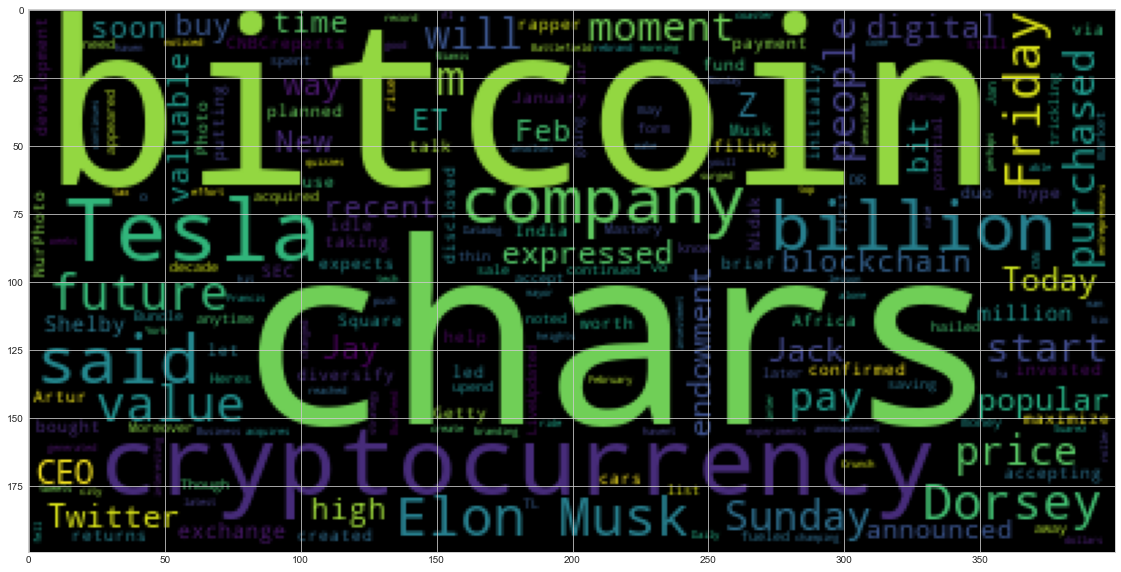

In [140]:
# Generate the Bitcoin word cloud
# YOUR CODE HERE!

wc = WordCloud().generate(bitcoin_sentiments_df['content'].str.cat())
plt.imshow(wc)

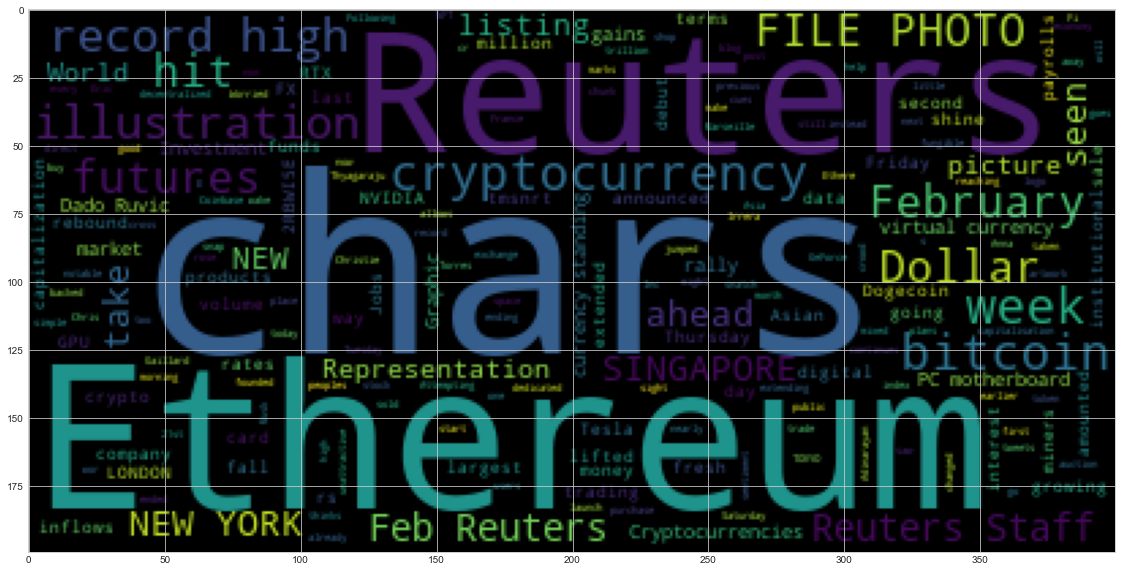

In [141]:
# Generate the Ethereum word cloud
# YOUR CODE HERE!


wc = WordCloud().generate(ethereum_sentiments_df['content'].str.cat())
plt.imshow(wc)

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [97]:
import spacy
from spacy import displacy

In [ ]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [98]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [101]:
# Concatenate all of the bitcoin text together
# YOUR CODE HERE!
all_contents=bitcoin_sentiments_df['content'].str.cat()

In [104]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
doc=nlp(all_contents)

# Add a title to the document
# YOUR CODE HERE!
doc.user_data['title']='Bitcoin NER'

In [105]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(doc, style='ent', jupyter=True)

In [106]:
# List all Entities
# YOUR CODE HERE!
for each_ent in doc.ents:
    print(each_ent.text, each_ent.label_)

Tesla ORG
$1.5 billion MONEY
Elon Musk PERSON
about $ 1.5 billion MONEY
January DATE
Artur ORG
Widak PRODUCT
NurPhoto ORG
Sunday DATE
Tesla ORG
$1.5 billion MONEY
Jack Dorsey PERSON
Jay Z PERSON
Africa LOC
India GPE
Dorsey ORG
Friday DATE
500 CARDINAL
chars]Today DATE
SEC ORG
Tesla ORG
$1.5 billion MONEY
Bitcoin PERSON
first ORDINAL
more than a decade later DATE
21.11 MONEY
Jan. 28 DATE
70% PERCENT
Bitcoin PERSON
Feb. 9, 2021 DATE
8:01 a.m. TIME
Feb. 9, 2021 DATE
8:01 a.m. TIME
Bitcoin PERSON
Teslas PERSON
Monday DATE
1.5 MONEY
this morning TIME
over $50,000 MONEY
Dorsey PERSON
Jay Z PERSON
Datadog ORG
Startup Battlefield ORG
BuzzFeed ORG
AI ORG
Daily Crunch WORK_OF_ART
February 12, 2021 DATE
Bitcoins PERSON
recent weeks DATE
Friday DATE
Francis Suarez PERSON
Friday DATE
Elon Musk PERSON
Twitter PRODUCT
Musk PERSON
CNN ORG
above $58,000 MONEY
Sunday DATE
just above $46,000 MONEY
Tuesday DATE
handshakes over millions CARDINAL
today DATE
2012 DATE
Alabamas PERSON
Richard Shelby PERSON
ne

---

## Ethereum NER

In [107]:
# Concatenate all of the bitcoin text together
# YOUR CODE HERE!
all_contents=ethereum_sentiments_df['content'].str.cat()

In [108]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
doc=nlp(all_contents)
# Add a title to the document
# YOUR CODE HERE!
doc.user_data['title']='Ethereum NER'

In [109]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(doc, style='ent', jupyter=True)

In [110]:
# List all Entities
# YOUR CODE HERE!
for each_ent in doc.ents:
    print(each_ent.text, each_ent.label_)

GeForce ORG
3060 GPE
GPU ORG
today DATE
2012 DATE
Ethereum ORG
February 3, 2018 DATE
Reuters ORG
Reuters ORG
Ethereum ORG
February 3, 2018 DATE
first ORDINAL
Christie's ORG
NFT ORG
a few days DATE
Chris Torres PERSON
3060 DATE
GPU ORG
next week DATE
Nvidia PERSON
this morning TIME
Reuters ORG
SINGAPORE GPE
Feb 9 DATE
Reuters ORG
Asia LOC
Tuesday DATE
Tesla Inc ORG
Reuters ORG
FILE PERSON
Bitcoin PERSON
Marseille GPE
France GPE
February 7, 2021 DATE
Eric Gaillard PERSON
SINGAPORE PERSON
Reuters ORG
chars]NEW YORK GPE
Reuters ORG
second ORDINAL
Thursday DATE
chars]NEW YORK GPE
Feb 18 DATE
Reuters ORG
second ORDINAL
Thursday DATE
Ethereum ORG
February 3, 2018 DATE
LONDON GPE
7.34% PERCENT
the week ending 21st February DATE
11.65% PERCENT
the previous week DATE
Ethereum ended ORG
the week DATE
1,935.57 MONEY
the week DATE
Friday DATE
Thyagaraju Adinarayan PERSON
Anna Irrera PERSON
Musk PERSON
Dogecoin GPE
Dogecoin GPE
nearly 68% PERCENT
$0.054496
 MONEY
YORK PERSON
Reuters ORG
$245 million